<a href="https://colab.research.google.com/github/mishenkoil/optimization-methods/blob/main/met_opt_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

# **Отчет по лабораторной работе №1**
[*Исходный код*](https://github.com/Rytuo/MetOpt/tree/master/lab1) <br>
***Преподаватель: Свинцов Михаил*** <br>
***Работу выполнили: Мищенко Илья, Мороз Николай, Попов Александр.***

# **Постановка задачи**
1.   Реализовать алгоритмы одномерной минимизации функции:
 *   метод дихтомии
 *   метод золотого сечения
 *    метод Фиббоначи
 *   метод парабол
 *   комбинированный метод брента
2.   Протестировать реализованные алгоритмы для представленной функции:
> $$f(x) = -3x \cdot sin(0.75 x) + e^{-2x} \quad x \in [0; 2\pi]$$
3.   Сравнить результат работы с аналитическим решением данной задачи (задача минимизации функции). Сделать соответствующие выводы.



# **Аналитическое решенеие**
*   Построим график функции $f(x)$, чтобы понимать как она себя ведет на заданном интервале.


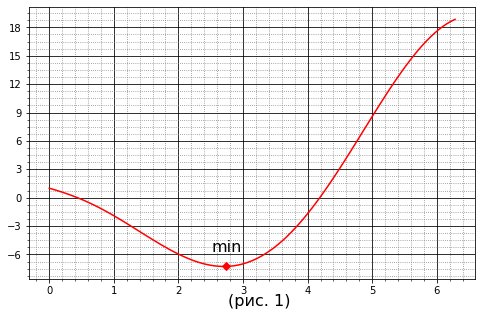

In [ ]:
def y(x):
  return -3 * x * np.sin(0.75 * x) + np.e ** (-2 * x)

def get_func_graph(func, segment_start, segment_end):
  fig, ax = plt.subplots()

  # Строим график f(x) на отрезке [0, 2pi]
  x = np.linspace(segment_start, segment_end, 100)
  y_min_pos = np.argmin(func(x))
  ax.plot(x, func(x), '-rD', markevery=[y_min_pos])

  # Устанавливаем внешний вид отображаемых делений
  ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
  ax.yaxis.set_major_locator(ticker.MultipleLocator(3))
  ax.grid(which='major', color='k')
  ax.minorticks_on()
  ax.grid(which='minor', color='gray', linestyle=':')

  fig.set_figwidth(8)
  fig.set_figheight(5)

  return fig, ax


fig, ax = get_func_graph(y, 0, 2 * np.pi)
plt.text(2.7065 - 0.2, -7.27 + 1.5, 'min', fontsize=16)
plt.figtext(0.47, 0.05, '(рис. 1)', fontsize=16)
plt.show()

*   Найдем аналитическое решение.
> $$f'(x) = (-3 x \cdot sin(0.75 x) + e^{-2 x})' = -2 e^{-2 x} - 2.25 x \cdot cos(0.75 x) - 3 \cdot sin(0.75 x)$$
$$\text{Рассмотрим: }f'(x) = 0 \Rightarrow$$
$$ -2 e^{-2 x} - 2.25 x \cdot cos(0.75 x) - 3 \cdot sin(0.75 x) = 0 \Rightarrow$$
$$\text{На интервале $[0, 2\pi]$ у уравнения $f'(x) = 0$ только один корень: $x \approx 2.706476$}$$


# **Результаты исследований по каждому методу**
*   Краткая сводка по реализованным методам:

In [ ]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
all_methods = pd.read_csv('https://raw.githubusercontent.com/Rytuo/MetOpt/master/lab1/output/all.csv?token=AGJ7WFGWAA3BFQ6HD7O6OBTAJ7ACS')
all_methods['difference from analytical solution'] = np.abs(all_methods['result'] - 2.706476)
print(all_methods)

             name    result  number of iterations  \
0       Dichotomy  2.706475                    72   
1  Golden section  2.706476                    52   
2       Fibonacci  2.706476                    53   
3       Parabolic  2.706476                    27   
4  Combined Brent  2.706476                    20   

   difference from analytical solution  
0                         1.072200e-06  
1                         4.269000e-07  
2                         4.245000e-07  
3                         4.166000e-07  
4                         4.235000e-07  


*   Результат работы **метода Дихотомии**:





In [ ]:
k = 1
def print_method_steps(df, segment_start, segment_end):
  # Отрисовываем y(x)
  fig, ax = get_func_graph(y, segment_start, segment_end)

  # Добавляем на график точки, полученные в ходе работы алгоритма
  if 'x' not in df: 
     df['x'] = (df['a'] + df['b']) / 2

  ax.scatter(df['x'], y(df['x']), color='cyan')
  global k
  k += 1
  plt.figtext(0.47, 0, f'(рис. {k})', fontsize=16)
  
  return ax

In [ ]:
dichotomy = pd.read_csv('https://raw.githubusercontent.com/Rytuo/MetOpt/master/lab1/output/dichotomy.csv?token=AGJ7WFCQJNL42GHKXI5PLNLAJ7GVE')
del dichotomy['n']
print(dichotomy)

    number of iterations         a         b        x1        x2     f(x1)  \
0                      2  0.000000  6.283185  3.141593  3.141593 -6.662457   
1                      4  0.000000  3.141593  1.570796  1.570796 -4.310466   
2                      6  1.570796  3.141593  2.356194  2.356194 -6.923779   
3                      8  2.356194  3.141593  2.748894  2.748894 -7.268827   
4                     10  2.356194  2.748894  2.552544  2.552544 -7.203932   
5                     12  2.552544  2.748894  2.650719  2.650719 -7.264955   
6                     14  2.650719  2.748894  2.699806  2.699806 -7.274222   
7                     16  2.699806  2.748894  2.724350  2.724350 -7.273380   
8                     18  2.699806  2.724350  2.712078  2.712078 -7.274262   
9                     20  2.699806  2.712078  2.705942  2.705942 -7.274357   
10                    22  2.705942  2.712078  2.709010  2.709010 -7.274338   
11                    24  2.705942  2.709010  2.707476  2.707476

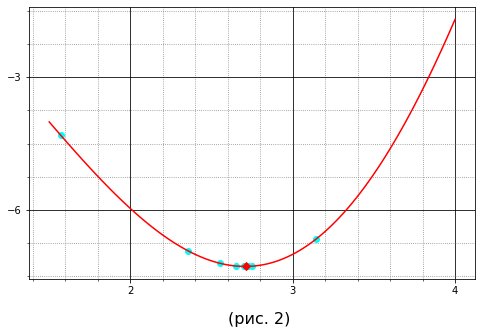

In [ ]:
print_method_steps(dichotomy, 1.5, 4)

*   Результат работы **метода золотого сечения**:


In [ ]:
golden_section = pd.read_csv('https://raw.githubusercontent.com/Rytuo/MetOpt/master/lab1/output/golden_section.csv?token=AGJ7WFBJILF5RIHPRXCJCOTAJ7HII')
del golden_section['n']
print(golden_section)

    number of iterations         a         b        x1        x2     f(x1)  \
0                      2  0.000000  6.283185  2.399963  3.883222 -7.003410   
1                      3  0.000000  3.883222  1.483259  2.399963 -3.939001   
2                      4  1.483259  3.883222  2.399963  2.966518 -7.003410   
3                      5  2.399963  3.883222  2.966518  3.316668 -7.060042   
4                      6  2.399963  3.316668  2.750113  2.966518 -7.268504   
5                      7  2.399963  2.966518  2.616368  2.750113 -7.249945   
6                      8  2.616368  2.966518  2.750113  2.832772 -7.268504   
7                      9  2.616368  2.832772  2.699027  2.750113 -7.274189   
8                     10  2.616368  2.750113  2.667454  2.699027 -7.269739   
9                     11  2.667454  2.750113  2.699027  2.718540 -7.274189   
10                    12  2.667454  2.718540  2.686967  2.699027 -7.273200   
11                    13  2.686967  2.718540  2.699027  2.706480

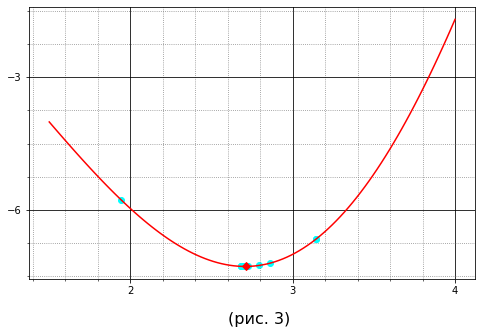

In [ ]:
print_method_steps(golden_section, 1.5, 4)

*   Результат работы **метода Фиббоначи**:



In [ ]:
fibonacci = pd.read_csv('https://raw.githubusercontent.com/Rytuo/MetOpt/master/lab1/output/fibonacci.csv?token=AGJ7WFH3CLQ65ZVQN3QSPSTAJ7D5U')
del fibonacci['n']
print(fibonacci)

    number of iterations         a         b        x1        x2     f(x1)  \
0                      2  0.000000  6.283185  2.399963  3.883222 -7.003410   
1                      3  0.000000  3.883222  1.483259  2.399963 -3.939001   
2                      4  1.483259  3.883222  2.399963  2.966518 -7.003410   
3                      5  2.399963  3.883222  2.966518  3.316668 -7.060042   
4                      6  2.399963  3.316668  2.750113  2.966518 -7.268504   
5                      7  2.399963  2.966518  2.616368  2.750113 -7.249945   
6                      8  2.616368  2.966518  2.750113  2.832772 -7.268504   
7                      9  2.616368  2.832772  2.699027  2.750113 -7.274189   
8                     10  2.616368  2.750113  2.667454  2.699027 -7.269739   
9                     11  2.667454  2.750113  2.699027  2.718540 -7.274189   
10                    12  2.667454  2.718540  2.686967  2.699027 -7.273200   
11                    13  2.686967  2.718540  2.699027  2.706480

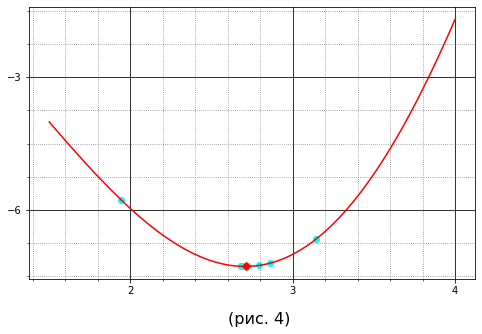

In [ ]:
print_method_steps(fibonacci, 1.5, 4)

*   Результат работы **метода парабол**:

In [ ]:
parabolic = pd.read_csv('https://raw.githubusercontent.com/Rytuo/MetOpt/master/lab1/output/parabolic.csv?token=AGJ7WFAKQG3CSC4M6QAFB3LAJ7LJQ')
del parabolic['n']
print(parabolic)

    number of iterations        x1        x2        x3     f(x1)     f(x2)  \
0                      4  0.000000  3.141593  6.283185  1.000000  3.141593   
1                      5  0.000000  2.296424  3.141593  1.000000  2.296424   
2                      6  2.296424  2.647083  3.141593 -6.800215  2.647083   
3                      7  2.647083  2.691865  3.141593 -7.263695  2.691865   
4                      8  2.691865  2.704403  3.141593 -7.273708  2.704403   
5                      9  2.704403  2.706011  3.141593 -7.274345  2.706011   
6                     10  2.706011  2.706405  3.141593 -7.274357  2.706405   
7                     11  2.706405  2.706461  3.141593 -7.274358  2.706461   
8                     12  2.706461  2.706473  3.141593 -7.274358  2.706473   
9                     13  2.706473  2.706475  3.141593 -7.274358  2.706475   
10                    14  2.706475  2.706476  3.141593 -7.274358  2.706476   
11                    15  2.706476  2.706476  3.141593 -7.274358

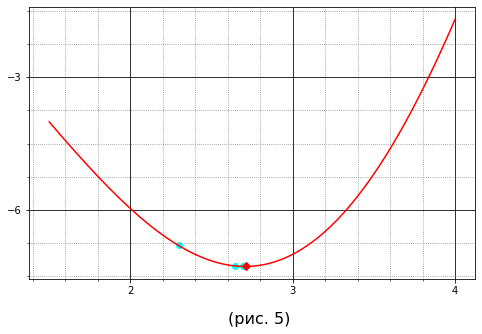

In [ ]:
print_method_steps(parabolic, 1.5, 4)

*   Результат работы **комбинированного метода Брента**:

In [ ]:
brent = pd.read_csv('https://raw.githubusercontent.com/Rytuo/MetOpt/master/lab1/output/brent.csv?token=AGJ7WFDTGEHOFZ6UDEOWY73AJ7MEO')
del brent['n']
print(brent)

    number of iterations         a         c         x      f(x)         w  \
0                      2  0.000000  6.283185  3.141593 -6.662457  3.141593   
1                      3  1.199982  6.283185  3.141593 -6.662457  1.199982   
2                      4  1.941611  6.283185  3.141593 -6.662457  1.941611   
3                      5  1.941611  3.141593  2.758222 -7.266115  3.141593   
4                      6  1.941611  2.758222  2.672980 -7.270952  2.758222   
5                      7  2.672980  2.758222  2.706843 -7.274358  2.672980   
6                      8  2.672980  2.706843  2.706336 -7.274358  2.706843   
7                      9  2.706336  2.706843  2.706475 -7.274358  2.706336   
8                     10  2.706475  2.706843  2.706476 -7.274358  2.706475   
9                     11  2.706475  2.706476  2.706476 -7.274358  2.706476   
10                    12  2.706476  2.706476  2.706476 -7.274358  2.706476   
11                    13  2.706476  2.706476  2.706476 -7.274358

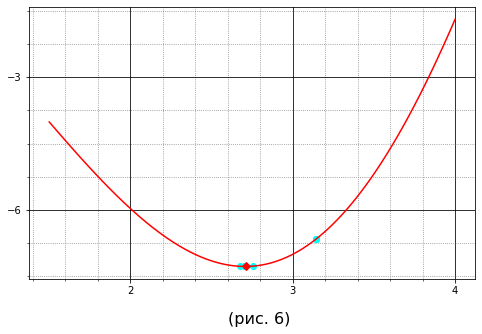

In [ ]:
print_method_steps(brent, 1.5, 4)

# **Сравнение методов**

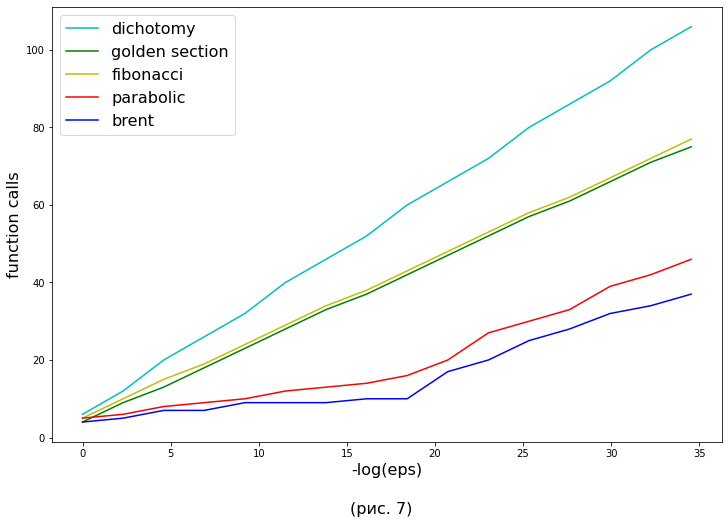

In [ ]:

perfomance = pd.read_csv('https://raw.githubusercontent.com/Rytuo/MetOpt/master/lab1/output/eps.csv')

def minus_log(eps):
  return -np.log(eps)

fig, ax = plt.subplots()

x = minus_log(perfomance['eps'])
ax.plot(x, perfomance['dichotomy'], '-c', label='dichotomy')
ax.plot(x, perfomance['golden section'], '-g', label='golden section')
ax.plot(x, perfomance['fibonacci'], '-y', label='fibonacci')
ax.plot(x, perfomance['parabolic'], '-r', label='parabolic')
ax.plot(x, perfomance['combined brent'], '-b', label='brent')

fig.set_figwidth(12)
fig.set_figheight(8)

plt.ylabel('function calls', fontsize=16)
plt.xlabel('-log(eps)', fontsize=16)
plt.legend(loc='best', fontsize=16)
plt.figtext(0.47, 0, '(рис. 7)', fontsize=16)
plt.show()

По графикам видно, что метод золотого сечения и метод Фиббоначи, пусть и решают задачу, но отнюдь не эффективно, в отличии от комбинированного метода Брента, который показал наилучшую производительность.

# **Тестирование реализованных алгоритмов на многомодальных функциях**
Приведенные выше алгоритмы решают задачу оптимизации для непрерывных унимодальных функций. Каждый из них использует оба этих свойства, благодаря этому компьютер гарантированно вычислит истинный результат при верной реализации. Рассмотрим, что произойдет, если эти свойства выполнены не будут: <br>
В качестве первого примера рассмотрим функцию, не обладающую свойством непрерывности:<br>
>$f(x) = 1, (x = 10)$<br>
$f(x) = 0, (x \neq 10)$<br>

Очевидно, данная функция имеет разрыв первого рода, и наши методы на ней не работают. Понятно, с чем это связано, более того, в данном случае оптимальное значение можно найти лишь методом перебора.<br>

Для непрерывной многомодальной функции наши алгоритмы могут повести себя непредсказуемо. Рассмотрим по порядку: метод дихотомии действует по принципу уменьшения длины интервала, на котором ищется минимум, что значит, что он гарантированно найдет локальный экстремум функции. Конечно же, это может быть не глобальный экстремум, который нам интересен в первую очередь. Метод золотого сечения и метод Фибоначчи действуют по аналогичному принципу, поэтому и результат их будет такой же. Всё сложнее в методе парабол: уже на первой итерации при функции.<br> 
>$f(x) = (|x - 10| - 5)^2$

 на интервале (0; 20) минимум параболы совпадет со средним значением (10), из-за чего функция его вернет, хотя ответ, очевидно, неверный. В комбинированном методе Брента введены специальные ограничения, которые обрабатывают такие ситуации, поэтому функция вернет какой-то локальный экстремум. 
 
Рассмотрим на примере несколько функций, на которых наши алгоритмы возвращают неверные значения. Первая из них, на которой сразу 4 алгоритма будут выдавать неверный результат –<br> 
>$sin(x) \cdot x$ 

на интервале (0; 20). Ожидаемая точка минимума: 17.36492266, этот результат выдаст метод дихотомии. Метод золотого сечения, метод Фибоначчи и метод парабол вернут число 11.12953999, а комбинированный метод Брента и вовсе 9.99999130. 
 
Конечно же, метод дихотомии не панацея, и на примере следующей функции неверный результат выдаст и он. Если задать в качестве функции.<br> 
>$sin(x) \cdot x^3$

 на интервале (-5; 9), то результат работы метода дихотомии будет -0.00000096, хотя на самом деле глобальный экстремум этой функции – 5.23294340, в данной функции его вернут нам метод золотого сечения и метод Фибоначчи.



# **Вывод**
*   Приведенные алгоритмы не предназначены для работы с многомодальными функциями, истинность результата их работы не гарантируется.
*   На практике лучше использовать комбинированный метод Брента для одномерной оптимизации функции, поскольку он сочетает в себе метод золотого сечения, который обладает линейной скоростью сходимости и метод парабол, который работает быстрее в окрестности оптимального решения, но на начальных стадиях может работать долго и неустойчиво.

# **Источники**
1.   http://www.machinelearning.ru/wiki/images/a/a8/MOMO12_min1d.pdf
2.   https://www.wolframalpha.com/input/?i=minimize+e%5E%28-2+x%29+-+3+x+sin%280.75+x%29
